In [1]:
import pandas as pd
import numpy as np
import datetime
from scorepi import *
from epiweeks import Week
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import datetime
from datetime import datetime
from datetime import timedelta
from pathlib import Path
import matplotlib as mpl
import random
from numba import njit
from scipy.stats import linregress
from scipy.stats import nbinom
import warnings
warnings.filterwarnings('ignore')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
mu=40
alpha=4
sig2 = 31

p =60/31**2
n = 60**2/(31**2-60)

In [1]:
60**2/(31**2-60)

3.995560488346282

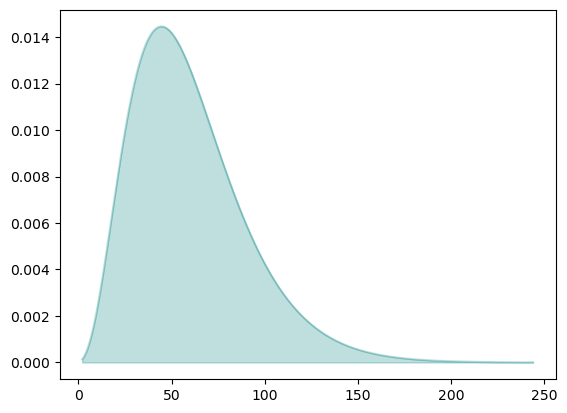

In [421]:
fig, ax = plt.subplots(1, 1)
x = np.arange(nbinom.ppf(0.0001, n, p),
              nbinom.ppf(0.9999, n, p))

pmf = nbinom.pmf(x, n, p)
plt.plot(x, nbinom.pmf(x, n, p), 'teal', alpha=.25 )

plt.fill_between(x, nbinom.pmf(x, n, p), color='teal', alpha=0.25)

In [532]:
plt.hist(nbinom.random(x, n, p))

AttributeError: 'nbinom_gen' object has no attribute 'random'

In [426]:
np.arange(nbinom.ppf(0.0001, n, p),
              nbinom.ppf(0.9999, n, p))

array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,
        68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,
        79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,
       101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 111.,
       112., 113., 114., 115., 116., 117., 118., 119., 120., 121., 122.,
       123., 124., 125., 126., 127., 128., 129., 130., 131., 132., 133.,
       134., 135., 136., 137., 138., 139., 140., 141., 142., 143., 144.,
       145., 146., 147., 148., 149., 150., 151., 15

In [10]:
from numba import njit
@njit
def energyscore(X,y):
    # X is matrix of trajectories, y is observations
    ES = 0
    N = X.shape[0]
    for i in range(N):
        ES += np.sqrt(np.sum((X[i]-y)**2))/N
    for i in range(N):
        for j in range(N):
            ES -= np.sqrt(np.sum((X[i]-X[j])**2))/(2*N**2)
    return ES


In [423]:
ESval = []
point = np.random.negative_binomial(n,p,100)
traj = np.empty([100,1])
for i in range(len(point)):
    traj[i] = np.array(point[i])
    
for x in np.arange(nbinom.ppf(0.0001, n, p), nbinom.ppf(0.9999, n, p)):
    ES = energyscore(traj, x)
    ESval.append(ES)

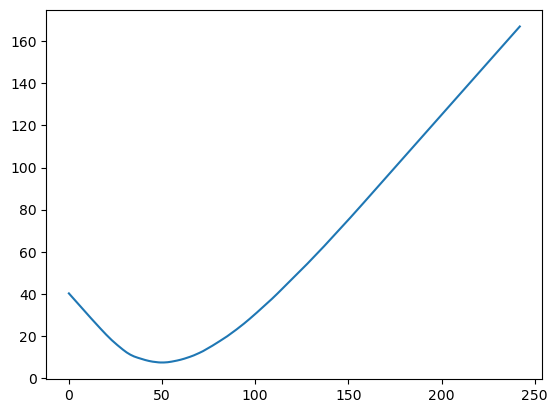

In [424]:
plt.plot(ESval)

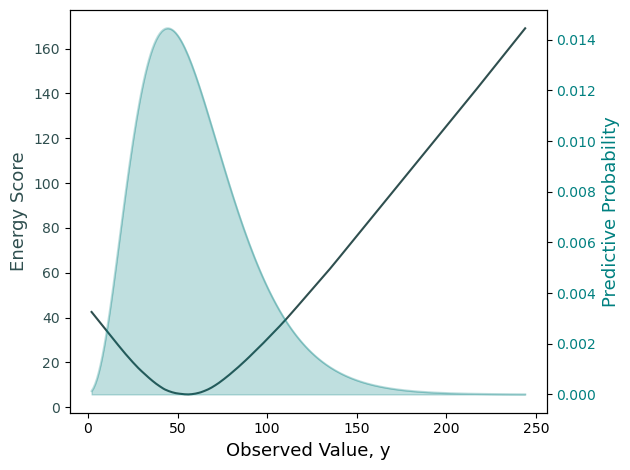

In [442]:
ESval = []
point = np.random.negative_binomial(n,p,100)
traj = np.empty([100,1])
for i in range(len(point)):
    traj[i] = np.array(point[i])
    
for x in np.arange(nbinom.ppf(0.0001, n, p), nbinom.ppf(0.9999, n, p)):
    ES = energyscore(traj, x)
    ESval.append(ES)


fig, ax1 = plt.subplots()

color = 'darkslategray'
ax1.set_xlabel('Observed Value, y', fontsize=13)
ax1.set_ylabel('Energy Score', color=color, fontsize=13)
ax1.plot(np.arange(nbinom.ppf(0.0001, n, p),
              nbinom.ppf(0.9999, n, p)), ESval, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis


x = np.arange(nbinom.ppf(0.0001, n, p),
              nbinom.ppf(0.9999, n, p))

pmf = nbinom.pmf(x, n, p)


color = 'teal'
ax2.set_ylabel('Predictive Probability', color=color, fontsize=13)  # we already handled the x-label with ax1
ax2.plot(x, nbinom.pmf(x, n, p), color=color, alpha=.25)
ax2.fill_between(x, nbinom.pmf(x, n, p),color=color, alpha=.25)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('../figs/ES_distribution_score.pdf')
plt.show()

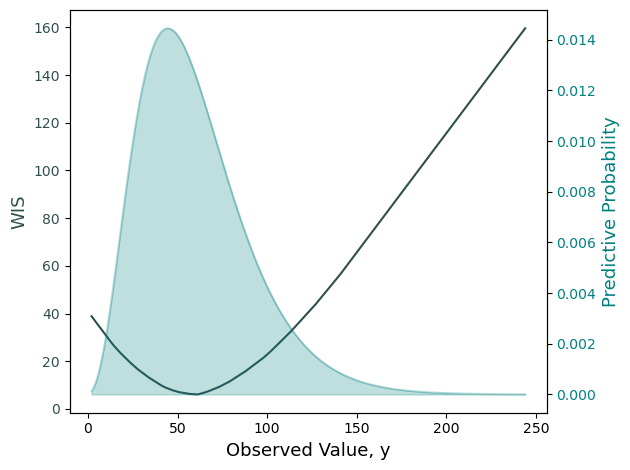

In [498]:
WISval = []
point = np.random.negative_binomial(n,p,100)
traj = np.empty([100,1])
for i in range(len(point)):
    traj[i] = np.array(point[i])
    
for x in np.arange(nbinom.ppf(0.0001, n, p), nbinom.ppf(0.9999, n, p)):
    y = [x]
    
    quantiles=[0.01,0.025,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.60,0.65,0.7,0.75,0.8,0.85,0.9,0.95,0.975,0.99]
    
    Q = np.quantile(traj,quantiles,axis=0)
    WIS = np.zeros(traj.shape[1])
    for i in range(len(quantiles) // 2):
        #print(i)
        interval_range = 100*(quantiles[-i-1]-quantiles[i])
        alpha = 1-(quantiles[-i-1]-quantiles[i])
        IS = interval_score(y,Q[i],Q[-i-1],interval_range)
        WIS += IS['interval_score']*alpha/2
    WIS += 0.5*np.abs(Q[len(quantiles) // 2 +1] - y[0])
        
    WIS = np.sum(WIS) / (len(quantiles) // 2 + 0.5)
    
    WISval.append(WIS)


fig, ax1 = plt.subplots()

color = 'darkslategray'
ax1.set_xlabel('Observed Value, y', fontsize=13)
ax1.set_ylabel('WIS', color=color, fontsize=13)
ax1.plot(np.arange(nbinom.ppf(0.0001, n, p),
              nbinom.ppf(0.9999, n, p)), WISval, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis


x = np.arange(nbinom.ppf(0.0001, n, p),
              nbinom.ppf(0.9999, n, p))

pmf = nbinom.pmf(x, n, p)


color = 'teal'
ax2.set_ylabel('Predictive Probability', color=color, fontsize=13)  # we already handled the x-label with ax1
ax2.plot(x, nbinom.pmf(x, n, p), color=color, alpha=.25)
ax2.fill_between(x, nbinom.pmf(x, n, p),color=color, alpha=.25)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('../figs/WIS_distribution_score.pdf')
plt.show()

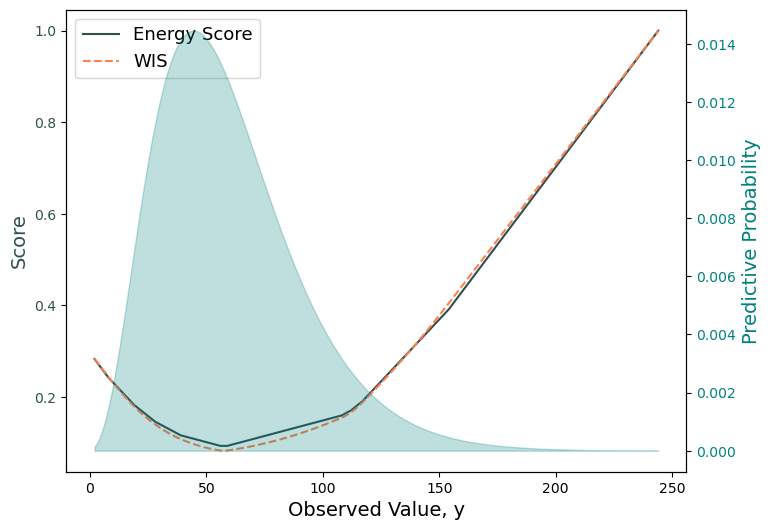

In [545]:
ESval = []
point = np.random.negative_binomial(n,p,10)
traj = np.empty([10,1])
for i in range(len(point)):
    traj[i] = np.array(point[i])
    
for x in np.arange(nbinom.ppf(0.0001, n, p), nbinom.ppf(0.9999, n, p)):
    ES = energyscore(traj, x)
    ESval.append(ES)


fig, ax1 = plt.subplots(figsize=(8,6))

color = 'darkslategray'
ax1.set_xlabel('Observed Value, y', fontsize=14)
ax1.set_ylabel('Score', color=color, fontsize=14)
ax1.plot(np.arange(nbinom.ppf(0.0001, n, p),
              nbinom.ppf(0.9999, n, p)), np.array(ESval)/np.max(ESval), color=color, label='Energy Score')
ax1.tick_params(axis='y', labelcolor=color)


WISval = []
    
for x in np.arange(nbinom.ppf(0.0001, n, p), nbinom.ppf(0.9999, n, p)):
    y = [x]
    
    #quantiles=[0.01,0.025,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.60,0.65,0.7,0.75,0.8,0.85,0.9,0.95,0.975,0.99]
    quantiles = np.linspace(0.001,0.999,101)
    
    Q = np.quantile(traj,quantiles,axis=0)
    WIS = np.zeros(traj.shape[1])
    for i in range(len(quantiles) // 2):
        #print(i)
        interval_range = 100*(quantiles[-i-1]-quantiles[i])
        alpha = 1-(quantiles[-i-1]-quantiles[i])
        IS = interval_score(y,Q[i],Q[-i-1],interval_range)
        WIS += IS['interval_score']*alpha/2
    WIS += 0.5*np.abs(Q[len(quantiles) // 2 +1] - y[0])
        
    WIS = np.sum(WIS) / (len(quantiles) // 2 + 0.5)
    
    WISval.append(WIS)



ax1.plot(np.arange(nbinom.ppf(0.0001, n, p),
              nbinom.ppf(0.9999, n, p)), np.array(WISval)/np.max(WISval),'--', color='coral', label = 'WIS')
plt.legend(fontsize=13)


ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis


x = np.arange(nbinom.ppf(0.0001, n, p),
              nbinom.ppf(0.9999, n, p))

pmf = nbinom.pmf(x, n, p)


color = 'teal'
ax2.set_ylabel('Predictive Probability', color=color, fontsize=14)  # we already handled the x-label with ax1
#ax2.plot(x, nbinom.pmf(x, n, p), color=color, alpha=.25)
ax2.fill_between(x, nbinom.pmf(x, n, p),color=color, alpha=.25)
#ax2.hist(nbinom.pmf(x, n, p),color=color, alpha=.25)
ax2.tick_params(axis='y', labelcolor=color)
#plt.axvline(x=60, ymin=0, ymax=160,linestyle='--', color = 'lightgray', alpha=1)


#fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('../figs/score_distribution.pdf')
plt.show()

In [520]:
np.arange(nbinom.ppf(0.0001, n, p), nbinom.ppf(0.9999, n, p))

array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,
        68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,
        79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,
       101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 111.,
       112., 113., 114., 115., 116., 117., 118., 119., 120., 121., 122.,
       123., 124., 125., 126., 127., 128., 129., 130., 131., 132., 133.,
       134., 135., 136., 137., 138., 139., 140., 141., 142., 143., 144.,
       145., 146., 147., 148., 149., 150., 151., 15

In [512]:
x[44]

46.0

In [488]:
def WIS(X,y, quantiles=[0.01,0.025,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.60,0.65,0.7,0.75,0.8,0.85,0.9,0.95,0.975,0.99]):
    #X is the matrix of trajectories
    #calculate quantiles
    Q = np.quantile(X,quantiles,axis=0)
    WIS = np.zeros(X.shape[1])
    for i in range(len(quantiles) // 2):
        print(i)
        interval_range = 100*(quantiles[-i-1]-quantiles[i])
        alpha = 1-(quantiles[-i-1]-quantiles[i])
        IS = interval_score(y,Q[i],Q[-i-1],interval_range)
        WIS += IS['interval_score']*alpha/2
    WIS += 0.5*np.abs(Q[len(quantiles) // 2 +1] - y[0])
        
    return np.sum(WIS) / (len(quantiles) // 2 + 0.5)

In [ ]:
#ugh

In [ ]:
# try something like fig 4 bracher paper, look at contribution of each term in energy score

In [8]:
from numba import njit
@njit
def energyscore_terms(X,y):
    # X is matrix of trajectories, y is observations
    ES1 = 0
    ES2 = 0
    N = X.shape[0]
    for i in range(N):
        ES1+=np.sqrt(np.sum((X[i]-y)**2))/N
    for i in range(N):
        for j in range(N):
            ES2 -= np.sqrt(np.sum((X[i]-X[j])**2))/(2*N**2)
    return ES1, ES2


In [4]:
target = 'hospitalization'
incidence=True
observations = pd.read_parquet(f"/Users/bay.c/Documents/GitHub/energy-score/fludat/truth_{'inc' if incidence else 'cum'}_{target}.pq")


models = 'MOBS_NEU-GLEAM_FLU'
predictionsall = pd.DataFrame()
for model in [models]:
    df = pd.read_parquet(f'/Users/bay.c/Documents/GitHub/energy-score/fludat/{model}_rd4.pq')
    print(model, len(df.location.unique()))
    
    predictionsall = pd.concat([predictionsall, df])
    
# filter by trajectories and only look at age group with all ages combined
predictions_traj = predictionsall[(predictionsall.output_type == 'sample') & \
                                   (predictionsall.age_group == '0-130')]
# filter by dates with data
predictions_traj = predictions_traj[predictions_traj.target_end_date <= pd.to_datetime(observations.date.max())]


start_week = pd.to_datetime('2023-09-09')
max_date = pd.to_datetime(observations.date.max())

   
# filter by dates with data
predictions = predictions_traj[(predictions_traj.target_end_date <= max_date) & 
                                (predictions_traj.Model == models)]  

MOBS_NEU-GLEAM_FLU 52


In [25]:
scenario = 'D'
location = 'US'
target = 'hosp'
incidence = True

map_alpha = lambda interval_range: 0.5 * (1-interval_range) + 0.1


if target == 'hosp':
    target_obs = 'hospitalization'
else:
    target_obs = target_obs
    

predictionsfilt = predictions[(predictions.scenario_id == scenario + '-2023-08-14') & \
                              (predictions.location == location) & \
                              (predictions.target == 'inc ' + target)  & \
                              (predictions.target_end_date <= max_date) & \
                              (predictions.target_end_date >= start_week)]


In [354]:
# ES for each week
observations['date'] = pd.to_datetime(observations['date'])

observations = observations[(observations['date'] >= start_week) & \
                                        (observations['date'] <= max_date)]   


#aggregate to weekly
observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()

#transform to Observation object
observations = Observations(observations)

#filter location
observations = observations[observations['location'] == location]

ESsum = []
ESsub = []
ESall = []
for date in observations.date.unique():
    obs = observations[observations.date==date]
    pdf = predictionsfilt[predictionsfilt.target_end_date==date]
    
    y = np.array(obs.value)
    X = [np.array(pdf[pdf['output_type_id'] == i].value) for i in pdf['output_type_id'].unique()]


    ES1, ES2 = energyscore_terms(np.array(X),y)

    ES = energyscore(np.array(X), y)
    
    ESsum.append(ES1)
    ESsub.append(ES2)
    ESall.append(ES)

In [12]:
import matplotlib.dates as mdates
def set_date_axis_fmt(ax):
    # Set the locator
    locator = mdates.MonthLocator()  # every month
    # Specify the format
    fmt = mdates.DateFormatter('%b %y')

    X = ax.xaxis
    X.set_major_locator(locator)
    # Specify formatter
    X.set_major_formatter(fmt)
    

([], [])

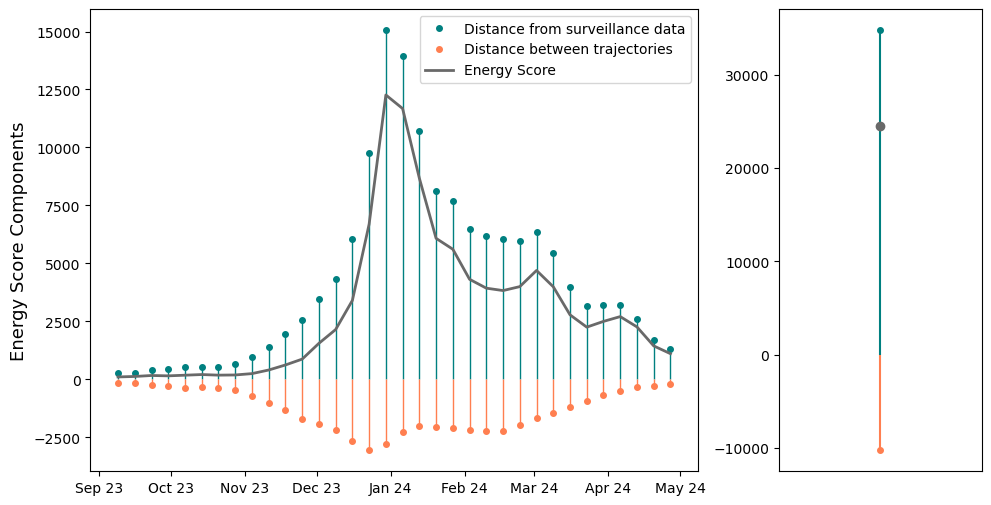

In [26]:
# ES for each week
observations['date'] = pd.to_datetime(observations['date'])

observations = observations[(observations['date'] >= start_week) & \
                                        (observations['date'] <= max_date)]   


#aggregate to weekly
observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()

#transform to Observation object
observations = Observations(observations)

#filter location
observations = observations[observations['location'] == location]

ESsum = []
ESsub = []
ESall = []
for date in observations.date.unique():
    obs = observations[observations.date==date]
    pdf = predictionsfilt[predictionsfilt.target_end_date==date]
    
    y = np.array(obs.value)
    X = [np.array(pdf[pdf['output_type_id'] == i].value) for i in pdf['output_type_id'].unique()]


    ES1, ES2 = energyscore_terms(np.array(X),y)

    ES = energyscore(np.array(X), y)
    
    ESsum.append(ES1)
    ESsub.append(ES2)
    ESall.append(ES)

dates = observations.date.unique()
fig, ax = plt.subplots(1,2,figsize=(11.5,6), width_ratios=[3, 1])
plt.subplot(1,2,1)
ax[0].vlines(dates, ymin=0, ymax=ESsum, color='teal', linewidth=1) 
  
# drawing the markers (circle) 
plt.plot(dates, ESsum, "o",markersize=4, color='teal', label='Distance from surveillance data') 

ax[0].vlines(dates, ymin=ESsub, ymax=0, color='coral', linewidth=1) 
plt.plot(dates, ESsub, "o",markersize=4, color='coral', label='Distance between trajectories') 
  
plt.plot(dates, ESall,linewidth=2, color='dimgray', label='Energy Score') 
set_date_axis_fmt(ax[0])
   
plt.legend()
plt.ylabel('Energy Score Components', fontsize=13)

# full ES
observations['date'] = pd.to_datetime(observations['date'])

observations = observations[(observations['date'] >= start_week) & \
                                        (observations['date'] <= max_date)]   

#aggregate to weekly
observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()

#transform to Observation object
observations = Observations(observations)

#filter location
observations = observations[observations['location'] == location]

ESsum = []
ESsub = []
ESall = []
 
y = np.array(observations.value)
X = [np.array(predictionsfilt[predictionsfilt['output_type_id'] == i].value) for i in pdf['output_type_id'].unique()]


ES1, ES2 = energyscore_terms(np.array(X),y)

ES = energyscore(np.array(X), y)

ESsum.append(ES1)
ESsub.append(ES2)
ESall.append(ES)

plt.subplot(1,2,2)
ax[1].vlines([1],ymin=0, ymax=ESsum, color='teal') 
  
# drawing the markers (circle) 
plt.plot([1], ESsum, "o",markersize=4, color='teal', label='distance from surveillance data') 

ax[1].vlines([1], ymin=ESsub, ymax=0, color='coral') 
plt.plot([1], ESsub, "o",markersize=4, color='coral', label='distance between trajectories') 
  
plt.plot([1], ESall,'o' ,markersize=6,color='dimgray', label='energy score') 
   
#plt.legend()

plt.xticks([])

#plt.savefig('../figs/energyscore_decomp.pdf')

In [201]:
# full ES
observations['date'] = pd.to_datetime(observations['date'])

observations = observations[(observations['date'] >= start_week) & \
                                        (observations['date'] <= max_date)]   

#aggregate to weekly
observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()

#transform to Observation object
observations = Observations(observations)

#filter location
observations = observations[observations['location'] == location]

ESsum = []
ESsub = []
ESall = []
 
y = np.array(observations.value)
X = [np.array(predictionsfilt[predictionsfilt['output_type_id'] == i].value) for i in pdf['output_type_id'].unique()]


ES1, ES2 = energyscore_terms(np.array(X),y)

ES = energyscore(np.array(X), y)

ESsum.append(ES1)
ESsub.append(ES2)
ESall.append(ES)

([], [])

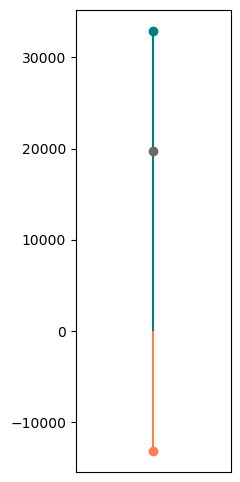

In [204]:
fig, ax = plt.subplots(1,1,figsize=(2,6))
ax.vlines([1],ymin=0, ymax=ESsum, color='teal') 
  
# drawing the markers (circle) 
plt.plot([1], ESsum, "o", color='teal', label='distance from surveillance data') 

ax.vlines([1], ymin=ESsub, ymax=0, color='coral') 
plt.plot([1], ESsub, "o", color='coral', label='distance between trajectories') 
  
plt.plot([1], ESall,'o' ,color='dimgray', label='energy score') 
   
#plt.legend()

plt.xticks([])

Text(0, 0.5, 'Fraction of Energy Score Value')

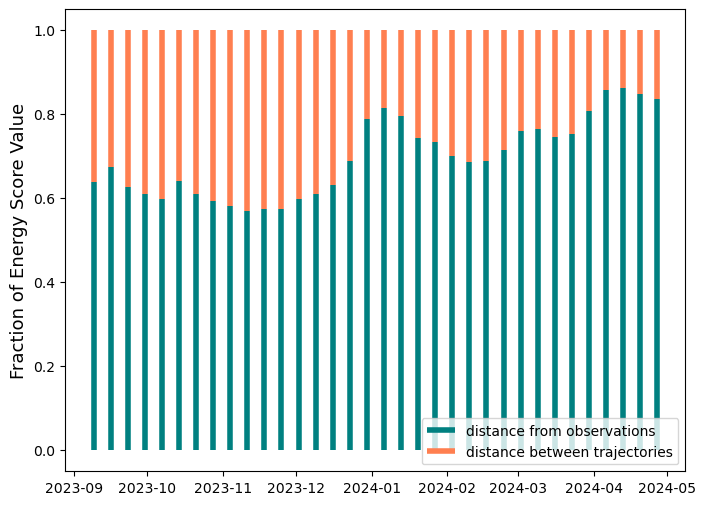

In [349]:
ESsum = []
ESsub = []
ESall = []
for date in observations.date.unique():
    obs = observations[observations.date==date]
    pdf = predictionsfilt[predictionsfilt.target_end_date==date]
    
    y = np.array(obs.value)
    X = [np.array(pdf[pdf['output_type_id'] == i].value) for i in pdf['output_type_id'].unique()]


    ES1, ES2 = energyscore_terms(np.array(X),y)

    ES = energyscore(np.array(X), y)
    
    ESsum.append(ES1)
    ESsub.append(ES2)
    ESall.append(ES)

dates = observations.date.unique()
ESsub = [-i for i in ESsub]
tot = [sum(x) for x in zip(ESsum, ESsub)]

calib = [i / j for i, j in zip(ESsum, tot)]
sharp = [i / j for i, j in zip(ESsub, tot)]

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.vlines(dates, ymin=0, ymax=calib, color='teal', linewidth=4, label = 'distance from observations') 
  
# drawing the markers (circle) 
ax.vlines(dates, ymin=calib, ymax=[sum(x) for x in zip(calib, sharp)], color='coral', linewidth=4, 
          label='distance between trajectories') 
   
plt.legend(loc='lower right')
plt.ylabel('Fraction of Energy Score Value', fontsize=13)

Text(0, 0.5, 'Fraction of Energy Score Value')

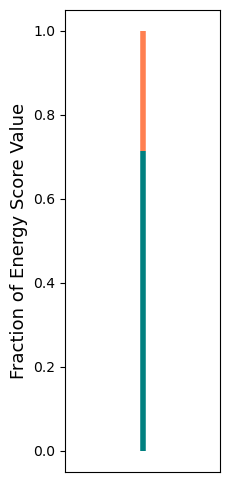

In [350]:
# full ES
observations['date'] = pd.to_datetime(observations['date'])

observations = observations[(observations['date'] >= start_week) & \
                                        (observations['date'] <= max_date)]   

#aggregate to weekly
observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()

#transform to Observation object
observations = Observations(observations)

#filter location
observations = observations[observations['location'] == location]

ESsum = []
ESsub = []
ESall = []
 
y = np.array(observations.value)
X = [np.array(predictionsfilt[predictionsfilt['output_type_id'] == i].value) for i in pdf['output_type_id'].unique()]


ES1, ES2 = energyscore_terms(np.array(X),y)

ES = energyscore(np.array(X), y)

ESsum.append(ES1)
ESsub.append(ES2)
ESall.append(ES)


dates = observations.date.unique()
ESsub = [-i for i in ESsub]
tot = [sum(x) for x in zip(ESsum, ESsub)]

calib = [i / j for i, j in zip(ESsum, tot)]
sharp = [i / j for i, j in zip(ESsub, tot)]

fig, ax = plt.subplots(1,1,figsize=(2,6))
ax.vlines([1], ymin=0, ymax=calib, color='teal', linewidth=4, label = 'distance from observations') 
  
# drawing the markers (circle) 
ax.vlines([1], ymin=calib, ymax=[sum(x) for x in zip(calib, sharp)], color='coral', linewidth=4, 
          label='distance between trajectories') 
   
#plt.legend(loc='lower right')
plt.xticks([])
plt.ylabel('Fraction of Energy Score Value', fontsize=13)

In [205]:
# do same for WIS


In [6]:
class Flusight_2324:
    
    # this method takes the average of all quantiles to find one projection that is an ensemble of all scenarios.
    # performed for all projection locations reported in the given DataFrame
    
    # Input dataframe must have: location, scenario_id, target_end_date, target, value, type, and quantile columns
    
    def __init__(self, df, obsdf, target, incidence = True, max_date = False, start_week = False, end_week = False):
        self.df = df # input dataframe with all scenarios, locations, and quantiles
        self.obsdf = obsdf # input of surveillance data of interest
        self.target = target # target metric of interest (case, death, hospitalization)
        self.inc = incidence # True if incident measures, False if cumulative
        self.max_date = max_date # maximum date you want to analyze, cut off date
        self.start_week = start_week # beginning of observations of interest
        self.end_week = end_week # end of observations of interest
        self.locations = pd.DataFrame()
        self.scenario_ensemble = pd.DataFrame()
        
        
    def get_locations(self):
        # get df with US state names, populations, and abbreviations and corresponding numerical code 
        locations = pd.read_csv('./dat/locations.csv',dtype={'location':str})
        
        self.locations = locations
        
        return locations
        
        
    def get_observations(self, target_location):
        # get and format surveillance data of interest
        observations = self.obsdf.copy()
        
        if self.target == 'hosp':
            target_obs = 'hospitalization'
        else:
            target_obs = self.target
            
        # read in observations dataframe
        observations = self.obsdf.copy()
        observations['date'] = pd.to_datetime(observations['date'])

        #filter start - end week
        if self.start_week:
            observations = observations[(observations['date'] >= pd.to_datetime(self.start_week.startdate())) ]
            
        if self.end_week:
            observations = observations[(observations['date'] <= pd.to_datetime(self.end_week.enddate()))]
                                

        #filter location
        observations = observations[observations['location'] == target_location]

        #aggregate to weekly
        observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()

        if self.max_date:
            observations = observations[observations['date'] <= max_date].copy()
            
        #observations = observations[['location', 'date', 'value']]

        #transform to Observation object
        observations = Observations(observations)

        return observations
    
    
    
    def format_forecasts(self, model, date, target_location):

        pred = pd.read_parquet(f"./dat/{model}_{date}.pq")
        pred['Model'] = model
        pred = pred[pred.output_type == 'quantile']
        pred['target_end_date'] = pd.to_datetime(pred['target_end_date'])
        if self.end_week:
            pred = pred[(pred['target_end_date'] <= pd.to_datetime(self.end_week.enddate()))]
        
        
        pred['output_type_id'] = pred["output_type_id"].astype(float)
        predictions = pred[pred['location'] == target_location].copy()

        return predictions
    
    
    def format_forecasts_all(self, dfformat):

        pred = dfformat.copy()
        pred = pred[pred.output_type == 'quantile']
        pred['target_end_date'] = pd.to_datetime(pred['target_end_date'])
        if self.end_week:
            pred = pred[(pred['target_end_date'] <= pd.to_datetime(self.end_week.enddate()))]
        
        
        pred['output_type_id'] = pred["output_type_id"].astype(float)
       # predictions = pred[pred['location'] == target_location].copy()

        return pred
        
    

class Scoring(Flusight_2324):
    # calculate score values for probabilistic epidemic forecasts 
    # find WIS, MAPE, and coverage over whole projection window as well as timestamped for every week.
    # uses scorepi package to calculate the scores 
    # score dataframe must have 'Model' column to differentiate and calculate scores for different models
    
    def __init__(self, df, obsdf, target, incidence = True, max_date = False, start_week = False, 
                 end_week = False):
        super().__init__(df, obsdf, target, incidence, max_date, start_week, end_week)
        #self.scoredf = scoredf #dataframe we want to use to calculate performance analysis/scoring
        
    def get_all_average_scores(self, models, date):
        #predictions = self.scoredf.copy()
        #predictions = Predictions(predictions, t_col = 'target_end_date')
        pred1 = self.df.copy()
        loclist = list(pred1.location.unique())
        
        
        allscore = {}
        for model in models:
            allscore[model] = {}
            for target_location in loclist:
                if target_location == '72':
                    continue
                #print(target_location)
                
                observations = self.get_observations(target_location)

                #pred = self.format_forecasts(model=model, date = date, target_location = target_location)
                pred = pred1[(pred1.Model==model) & (pred1['location']==target_location)]
                pred = Predictions(pred, t_col = 'target_end_date', quantile_col = 'quantile')

                d,_ = score_utils.all_scores_from_df(observations, pred, mismatched_allowed=False)

                allscore[model][target_location] = d
            
        
        return allscore
    
    def organize_average_scores(self, want_scores, models, date):
        # want_scores is list of scores you want to save in the dataframe
        # wis is 'wis_mean', and all coverages are '10_cov', '20_cov', ... '95_cov' etc.
        
        average_scores = pd.DataFrame()
        
        allscore = self.get_all_average_scores(models, date)
        
        for model in allscore.keys():
            scoresmod = allscore[model]
            for loc in scoresmod.keys():
                
                    
                scoresloc = scoresmod[loc]

                scoredict = {'Model': model ,'location': loc}
                for score in want_scores:
                    scoredict[score] = scoresloc[score]


                average_scores = pd.concat([average_scores, pd.DataFrame(scoredict, index=[0])])

        
        average_scores = average_scores.reset_index() 
        average_scores = average_scores.drop(columns=['index'])
        
        return average_scores
    
    def get_all_timestamped_scores(self, models, date):
        pred = self.df.copy()
        loclist = list(pred.location.unique())
        
        allscore = {}
        
        for model in models:
            allscore[model] = {}
            for target_location in loclist:
                    
                observations = self.get_observations(target_location)
                
                try:
                    #pred = self.format_forecasts(model=model, date = date, target_location = target_location)
                    predss = pred[pred['location'] == target_location]
                    predss = Predictions(predss, t_col = 'target_end_date', quantile_col = 'quantile')
                    
                    if len(predss)==0:
                        continue
                    
                    allscore[model][target_location] = {}
                    for t in predss.target_end_date.unique():
                        prednew = predss[predss.target_end_date == t]
                        obsnew = observations[observations.date == t]

                        obsnew = Observations(obsnew)
                        prednew = Predictions(prednew, t_col = 'target_end_date', quantile_col = 'quantile')

                        d = score_utils.all_timestamped_scores_from_df(obsnew, prednew)

                        allscore[model][target_location][t] = d
                except Exception as e:
                    print(e)

        #self.allavgscores = allscore
        
        return allscore
    
    def organize_timestamped_scores(self, want_scores, models, date):
        # want_scores is list of scores you want to save in the dataframe
        # wis is 'wis'
        
        time_scores = pd.DataFrame()
        
        allscore = self.get_all_timestamped_scores(models=models, date=date)
        
        for model in allscore.keys():
            scoremod = allscore[model]
        
            for loc in scoremod.keys():
                    
                scoresloc = scoremod[loc]

                for t in scoresloc.keys():
                    tdf = scoresloc[t]

                    scoredict = {'Model':model ,'location':loc, 'target_end_date':t}
                    for score in want_scores:
                        scoredict[score] = tdf[score]


                    time_scores = pd.concat([time_scores, pd.DataFrame(scoredict, index=[0])])

        
        time_scores = time_scores.reset_index() 
        time_scores = time_scores.drop(columns=['index'])
        
        return time_scores
    

In [27]:
quantiles=[0.01,0.025,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.60,
                        0.65,0.7,0.75,0.8,0.85,0.9,0.95,0.975,0.99]
    

predictionsfilt = predictions[(predictions.scenario_id == scenario + '-2023-08-14') & \
                              (predictions.location == location) & \
                              (predictions.target == 'inc ' + target)  & \
                              (predictions.target_end_date <= max_date) & \
                              (predictions.target_end_date >= start_week)]


X = [np.array(predictionsfilt[predictionsfilt['output_type_id'] == i].value) for i in pdf['output_type_id'].unique()]

# get quantiles
Q = np.quantile(X,quantiles,axis=0)


In [28]:
dates = predictionsfilt.target_end_date.unique()
predictionsquant = pd.DataFrame()
for i in range(len(quantiles)):
    quant = quantiles[i]
    val = Q[i]
    
    row = pd.DataFrame({'scenario_id':scenario+'-2023-08-14', 'location':'US', 'target':'inc hosp', 
                        'Model':'MOBS_NEU-GLEAM_FLU', 'target_end_date':dates, 'quantile':quant, 'value':val})
    
    predictionsquant = pd.concat([predictionsquant, row])

In [29]:
test = Scoring(df=predictionsquant, obsdf=observations, target='hosp', incidence = True, max_date = False, 
                        start_week = Week(2023, 36), end_week = Week(2024, 17))

out = test.organize_timestamped_scores(want_scores = ['10_interval_score', '10_dispersion', '10_underprediction',
       '10_overprediction', '20_interval_score', '20_dispersion',
       '20_underprediction', '20_overprediction', '30_interval_score',
       '30_dispersion', '30_underprediction', '30_overprediction',
       '40_interval_score', '40_dispersion', '40_underprediction',
       '40_overprediction', '50_interval_score', '50_dispersion',
       '50_underprediction', '50_overprediction', '60_interval_score',
       '60_dispersion', '60_underprediction', '60_overprediction',
       '70_interval_score', '70_dispersion', '70_underprediction',
       '70_overprediction', '80_interval_score', '80_dispersion',
       '80_underprediction', '80_overprediction', '90_interval_score',
       '90_dispersion', '90_underprediction', '90_overprediction',
       '95_interval_score', '95_dispersion', '95_underprediction',
       '95_overprediction', '98_interval_score', '98_dispersion',
       '98_underprediction', '98_overprediction', 'wis'], models = [model], date='2023-08-14')

#out = test.get_all_timestamped_scores( models = [model], date='2023-08-14')
outtimestamp = out

In [30]:
weights = []
pis = [.1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .98]
for i in pis:
    weights.append(1-i)

In [31]:
dispersion = out[['10_dispersion', '20_dispersion', '30_dispersion', '40_dispersion', '50_dispersion',
                 '60_dispersion', '70_dispersion', '80_dispersion', '90_dispersion', '95_dispersion',
                 '98_dispersion']]

underprediction = out[['10_underprediction', '20_underprediction', '30_underprediction', '40_underprediction', 
                       '50_underprediction', '60_underprediction', '70_underprediction', '80_underprediction', 
                       '90_underprediction', '95_underprediction', '98_underprediction']]

overprediction = out[['10_overprediction', '20_overprediction', '30_overprediction', '40_overprediction', 
                       '50_overprediction', '60_overprediction', '70_overprediction', '80_overprediction', 
                       '90_overprediction', '95_overprediction', '98_overprediction']]

In [32]:
dispersion['10_dispersion'] = dispersion['10_dispersion']*(weights[0]/2)*1/(11.5)
dispersion['20_dispersion'] = dispersion['20_dispersion']*(weights[1]/2)*1/(11.5)
dispersion['30_dispersion'] = dispersion['30_dispersion']*(weights[2]/2)*1/(11.5)
dispersion['40_dispersion'] = dispersion['40_dispersion']*(weights[3]/2)*1/(11.5)
dispersion['50_dispersion'] = dispersion['50_dispersion']*(weights[4]/2)*1/(11.5)
dispersion['60_dispersion'] = dispersion['60_dispersion']*(weights[5]/2)*1/(11.5)
dispersion['70_dispersion'] = dispersion['70_dispersion']*(weights[6]/2)*1/(11.5)
dispersion['80_dispersion'] = dispersion['80_dispersion']*(weights[7]/2)*1/(11.5)
dispersion['90_dispersion'] = dispersion['90_dispersion']*(weights[8]/2)*1/(11.5)
dispersion['95_dispersion'] = dispersion['95_dispersion']*(weights[9]/2)*1/(11.5)
dispersion['98_dispersion'] = dispersion['98_dispersion']*(weights[10]/2)*1/(11.5)

underprediction['10_underprediction'] = underprediction['10_underprediction']*(weights[0]/2)*1/(11.5)
underprediction['20_underprediction'] = underprediction['20_underprediction']*(weights[1]/2)*1/(11.5)
underprediction['30_underprediction'] = underprediction['30_underprediction']*(weights[2]/2)*1/(11.5)
underprediction['40_underprediction'] = underprediction['40_underprediction']*(weights[3]/2)*1/(11.5)
underprediction['50_underprediction'] = underprediction['50_underprediction']*(weights[4]/2)*1/(11.5)
underprediction['60_underprediction'] = underprediction['60_underprediction']*(weights[5]/2)*1/(11.5)
underprediction['70_underprediction'] = underprediction['70_underprediction']*(weights[6]/2)*1/(11.5)
underprediction['80_underprediction'] = underprediction['80_underprediction']*(weights[7]/2)*1/(11.5)
underprediction['90_underprediction'] = underprediction['90_underprediction']*(weights[8]/2)*1/(11.5)
underprediction['95_underprediction'] = underprediction['95_underprediction']*(weights[9]/2)*1/(11.5)
underprediction['98_underprediction'] = underprediction['98_underprediction']*(weights[10]/2)*1/(11.5)

overprediction['10_overprediction'] = overprediction['10_overprediction']*(weights[0]/2)*1/(11.5)
overprediction['20_overprediction'] = overprediction['20_overprediction']*(weights[1]/2)*1/(11.5)
overprediction['30_overprediction'] = overprediction['30_overprediction']*(weights[2]/2)*1/(11.5)
overprediction['40_overprediction'] = overprediction['40_overprediction']*(weights[3]/2)*1/(11.5)
overprediction['50_overprediction'] = overprediction['50_overprediction']*(weights[4]/2)*1/(11.5)
overprediction['60_overprediction'] = overprediction['60_overprediction']*(weights[5]/2)*1/(11.5)
overprediction['70_overprediction'] = overprediction['70_overprediction']*(weights[6]/2)*1/(11.5)
overprediction['80_overprediction'] = overprediction['80_overprediction']*(weights[7]/2)*1/(11.5)
overprediction['90_overprediction'] = overprediction['90_overprediction']*(weights[8]/2)*1/(11.5)
overprediction['95_overprediction'] = overprediction['95_overprediction']*(weights[9]/2)*1/(11.5)
overprediction['98_overprediction'] = overprediction['98_overprediction']*(weights[10]/2)*1/(11.5)

In [37]:
dispersion['total'] = dispersion['10_dispersion'] + dispersion['20_dispersion'] + dispersion['30_dispersion'] + \
                      dispersion['40_dispersion'] + dispersion['50_dispersion'] + dispersion['60_dispersion'] + \
                      dispersion['70_dispersion'] + dispersion['80_dispersion'] + dispersion['90_dispersion'] + \
                      dispersion['95_dispersion'] + dispersion['98_dispersion'] 

underprediction['total'] = underprediction['10_underprediction'] + underprediction['20_underprediction'] + \
                           underprediction['30_underprediction'] + underprediction['40_underprediction'] + \
                           underprediction['50_underprediction'] + underprediction['60_underprediction'] + \
                           underprediction['70_underprediction'] + underprediction['80_underprediction'] + \
                           underprediction['90_underprediction'] + underprediction['95_underprediction'] + \
                           underprediction['98_underprediction'] 

overprediction['total'] = overprediction['10_overprediction'] + overprediction['20_overprediction'] + \
                           overprediction['30_overprediction'] + overprediction['40_overprediction'] + \
                           overprediction['50_overprediction'] + overprediction['60_overprediction'] + \
                           overprediction['70_overprediction'] + overprediction['80_overprediction'] + \
                           overprediction['90_overprediction'] + overprediction['95_overprediction'] + \
                           overprediction['98_overprediction'] 

([], [])

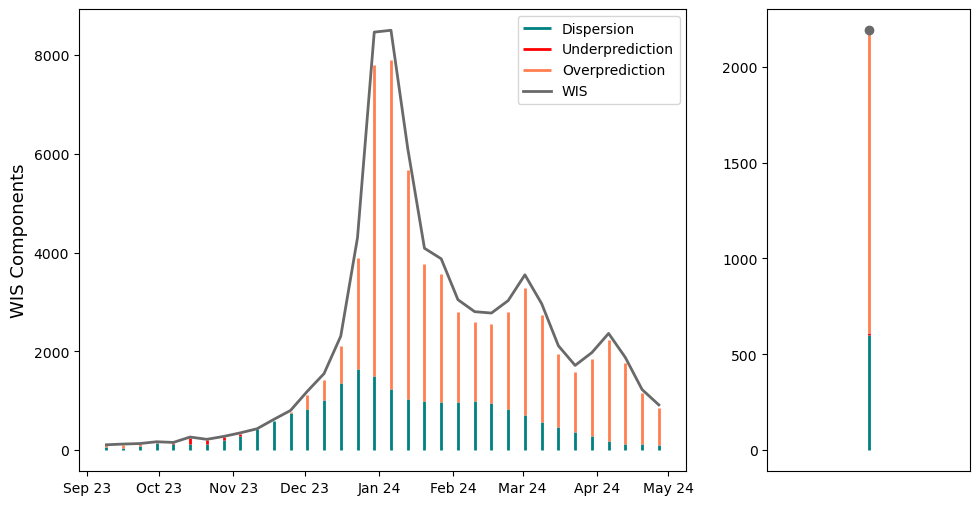

In [411]:
dates = observations.date.unique()
fig, ax = plt.subplots(1,2,figsize=(11.5,6), width_ratios=[3, 1])
plt.subplot(1,2,1)
ax[0].vlines(dates, ymin=0, ymax=dispersion.total, color='teal', linewidth=2, label='Dispersion') 
#plt.plot(dates, dispersion.total, "o",markersize=4, color='teal', label='dispersion') 

ax[0].vlines(dates, ymin=dispersion.total, ymax=dispersion.total+underprediction.total, color='red', linewidth=2,
          label='Underprediction') 
#plt.plot(dates, dispersion.total+underprediction.total, "o",markersize=4, color='red', label='underprediction') 

ax[0].vlines(dates, ymin=dispersion.total+underprediction.total, 
          ymax=overprediction.total+dispersion.total+underprediction.total, color='coral', linewidth=2,
         label='Overprediction') 
#plt.plot(dates, overprediction.total+dispersion.total+underprediction.total, "o",markersize=4, color='coral', 
#         label='overprediction') 

  
plt.plot(dates, outtimestamp.wis,'-' ,linewidth=2, color='dimgray', label='WIS') 
   
plt.legend()
#plt.yscale('log')
#plt.title('WIS')
plt.ylabel('WIS Components', fontsize=13)
set_date_axis_fmt(ax[0])


# full WIS

test = Scoring(df=predictionsquant, obsdf=observations, target='hosp', incidence = True, max_date = False, 
                        start_week = Week(2023, 36), end_week = Week(2024, 17))

out = test.organize_average_scores(want_scores = ['dispersion_wis_fraction', 'underprediction_wis_fraction', 
                                                  'overprediction_wis_fraction', 'wis_mean'], 
                                                   models = [model], date='2023-08-14')

out['dispersion'] = out['dispersion_wis_fraction'] * out['wis_mean']
out['underprediction'] = out['underprediction_wis_fraction'] * out['wis_mean']
out['overprediction'] = out['overprediction_wis_fraction'] * out['wis_mean']


plt.subplot(1,2,2)

ax[1].vlines([1],ymin=0, ymax=out['dispersion'], color='teal', lw=2) 
  
ax[1].vlines([1], ymin=out['dispersion'], ymax=out['dispersion'] + out['underprediction'], color='red', lw=2) 
ax[1].vlines([1], ymin=out['dispersion']+out['underprediction'], 
          ymax=out['dispersion']+ out['underprediction'] + out['overprediction'], color='coral', lw=2) 

plt.plot([1], out['wis_mean'],'o' ,markersize=6,color='dimgray', label='WIS') 

#plt.legend()

plt.xticks([])


#plt.savefig('../figs/WIS_components.pdf')

In [34]:
# full WIS

test = Scoring(df=predictionsquant, obsdf=observations, target='hosp', incidence = True, max_date = False, 
                        start_week = Week(2023, 36), end_week = Week(2024, 17))

out = test.organize_average_scores(want_scores = ['dispersion_wis_fraction', 'underprediction_wis_fraction', 
                                                  'overprediction_wis_fraction', 'wis_mean'], 
                                                   models = [model], date='2023-08-14')


Text(0, 0.5, 'Fraction of WIS')

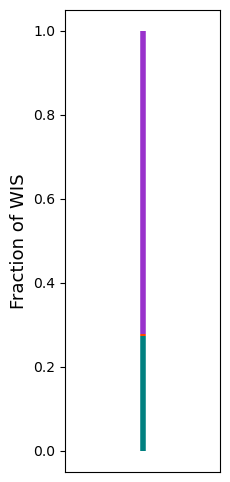

In [352]:
fig, ax = plt.subplots(1,1,figsize=(2,6))
ax.vlines([1],ymin=0, ymax=out['dispersion_wis_fraction'], color='teal', lw=4) 
  
ax.vlines([1], ymin=out['dispersion_wis_fraction'], ymax=out['dispersion_wis_fraction']+\
          out['underprediction_wis_fraction'], color='orangered', lw=4) 
ax.vlines([1], ymin=out['dispersion_wis_fraction']+out['underprediction_wis_fraction'], 
          ymax=out['dispersion_wis_fraction']+ out['underprediction_wis_fraction']+\
          out['overprediction_wis_fraction'], color='darkorchid', lw=4) 
#plt.legend()

plt.xticks([])
plt.ylabel('Fraction of WIS', fontsize=13)

In [35]:
dfall = pd.DataFrame()
for date in predictionsquant.target_end_date.unique():
    pred = predictionsquant[predictionsquant.target_end_date==date]
    obs = observations[observations.date==date]
    
    test = Scoring(df=pred, obsdf=obs, target='hosp', incidence = True, max_date = False, 
                            start_week = Week(2023, 36), end_week = Week(2024, 17))

    out = test.organize_average_scores(want_scores = ['dispersion_wis_fraction', 'underprediction_wis_fraction', 
                                                      'overprediction_wis_fraction', 'wis_mean'],
                                                       models = [model], date='2023-08-14')
    
    out['target_end_date'] = date
    dfall = pd.concat([dfall, out])

Text(0, 0.5, 'Fraction of WIS score')

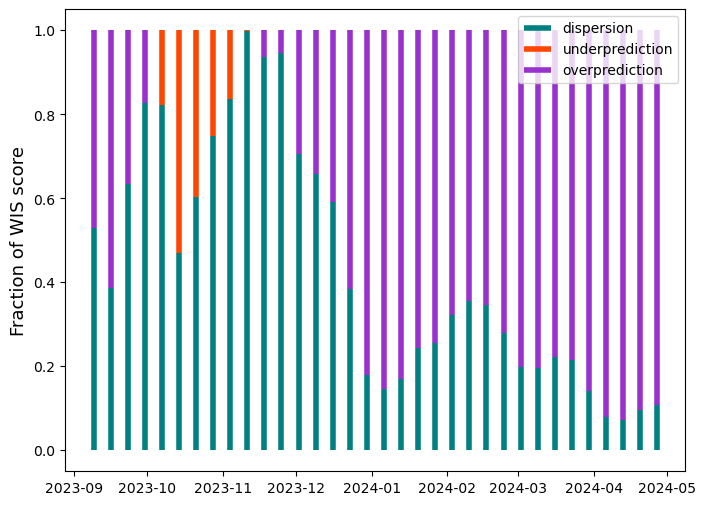

In [322]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
dates = predictionsquant.target_end_date.unique()
ax.vlines(dates,ymin=0, ymax=dfall['dispersion_wis_fraction'], color='teal', lw=4, label='dispersion') 
  
ax.vlines(dates, ymin=dfall['dispersion_wis_fraction'], ymax=dfall['dispersion_wis_fraction']+\
          dfall['underprediction_wis_fraction'], color='orangered', lw=4, label='underprediction') 
ax.vlines(dates, ymin=dfall['dispersion_wis_fraction']+dfall['underprediction_wis_fraction'], 
          ymax=dfall['dispersion_wis_fraction']+ dfall['underprediction_wis_fraction']+\
          dfall['overprediction_wis_fraction'], color='darkorchid', lw=4, label='overprediction') 
plt.legend()

plt.ylabel('Fraction of WIS score', fontsize=13)


([], [])

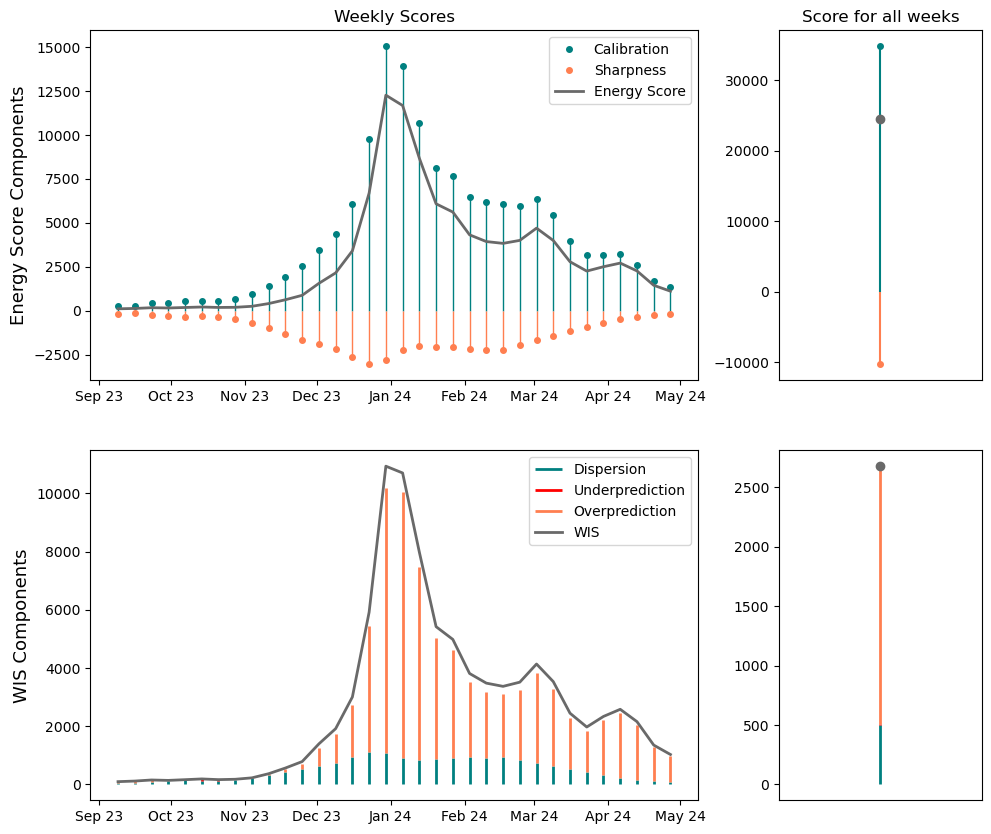

In [41]:
# merge together

# ES for each week
observations['date'] = pd.to_datetime(observations['date'])

observations = observations[(observations['date'] >= start_week) & \
                                        (observations['date'] <= max_date)]   


#aggregate to weekly
observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()

#transform to Observation object
observations = Observations(observations)

#filter location
observations = observations[observations['location'] == location]

ESsum = []
ESsub = []
ESall = []
for date in observations.date.unique():
    obs = observations[observations.date==date]
    pdf = predictionsfilt[predictionsfilt.target_end_date==date]
    
    y = np.array(obs.value)
    X = [np.array(pdf[pdf['output_type_id'] == i].value) for i in pdf['output_type_id'].unique()]


    ES1, ES2 = energyscore_terms(np.array(X),y)

    ES = energyscore(np.array(X), y)
    
    ESsum.append(ES1)
    ESsub.append(ES2)
    ESall.append(ES)

dates = observations.date.unique()
fig, ax = plt.subplots(2,2,figsize=(11.5,10), width_ratios=[3, 1])
plt.subplot(2,2,1)
ax[0][0].vlines(dates, ymin=0, ymax=ESsum, color='teal', linewidth=1) 
  
# drawing the markers (circle) 
plt.plot(dates, ESsum, "o",markersize=4, color='teal', label='Calibration') 

ax[0][0].vlines(dates, ymin=ESsub, ymax=0, color='coral', linewidth=1) 
plt.plot(dates, ESsub, "o",markersize=4, color='coral', label='Sharpness') 
  
plt.plot(dates, ESall,linewidth=2, color='dimgray', label='Energy Score') 
set_date_axis_fmt(ax[0][0])
   
plt.legend()
plt.ylabel('Energy Score Components', fontsize=13)

plt.title('Weekly Scores')

# full ES
observations['date'] = pd.to_datetime(observations['date'])

observations = observations[(observations['date'] >= start_week) & \
                                        (observations['date'] <= max_date)]   

#aggregate to weekly
observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()

#transform to Observation object
observations = Observations(observations)

#filter location
observations = observations[observations['location'] == location]

ESsum = []
ESsub = []
ESall = []
 
y = np.array(observations.value)
X = [np.array(predictionsfilt[predictionsfilt['output_type_id'] == i].value) for i in pdf['output_type_id'].unique()]


ES1, ES2 = energyscore_terms(np.array(X),y)

ES = energyscore(np.array(X), y)

ESsum.append(ES1)
ESsub.append(ES2)
ESall.append(ES)

plt.subplot(2,2,2)
ax[0][1].vlines([1],ymin=0, ymax=ESsum, color='teal') 
  
# drawing the markers (circle) 
plt.plot([1], ESsum, "o",markersize=4, color='teal', label='Calibration') 

ax[0][1].vlines([1], ymin=ESsub, ymax=0, color='coral') 
plt.plot([1], ESsub, "o",markersize=4, color='coral', label='Sharpness') 
  
plt.plot([1], ESall,'o' ,markersize=6,color='dimgray', label='energy score') 
   
#plt.legend()

plt.xticks([])
plt.title('Score for all weeks')
#plt.savefig('../figs/energyscore_decomp.pdf')



######################### WIS ###############################

dates = observations.date.unique()
#fig, ax = plt.subplots(1,2,figsize=(11.5,6), width_ratios=[3, 1])
plt.subplot(2,2,3)
ax[1][0].vlines(dates, ymin=0, ymax=dispersion.total, color='teal', linewidth=2, label='Dispersion') 
#plt.plot(dates, dispersion.total, "o",markersize=4, color='teal', label='dispersion') 

ax[1][0].vlines(dates, ymin=dispersion.total, ymax=dispersion.total+underprediction.total, color='red', linewidth=2,
          label='Underprediction') 
#plt.plot(dates, dispersion.total+underprediction.total, "o",markersize=4, color='red', label='underprediction') 

ax[1][0].vlines(dates, ymin=dispersion.total+underprediction.total, 
          ymax=overprediction.total+dispersion.total+underprediction.total, color='coral', linewidth=2,
         label='Overprediction') 
#plt.plot(dates, overprediction.total+dispersion.total+underprediction.total, "o",markersize=4, color='coral', 
#         label='overprediction') 

  
plt.plot(dates, outtimestamp.wis,'-' ,linewidth=2, color='dimgray', label='WIS') 
   
plt.legend()
#plt.yscale('log')
#plt.title('WIS')
plt.ylabel('WIS Components', fontsize=13)
set_date_axis_fmt(ax[1][0])


# full WIS

test = Scoring(df=predictionsquant, obsdf=observations, target='hosp', incidence = True, max_date = False, 
                        start_week = Week(2023, 36), end_week = Week(2024, 17))

out = test.organize_average_scores(want_scores = ['dispersion_wis_fraction', 'underprediction_wis_fraction', 
                                                  'overprediction_wis_fraction', 'wis_mean'], 
                                                   models = [model], date='2023-08-14')

out['dispersion'] = out['dispersion_wis_fraction'] * out['wis_mean']
out['underprediction'] = out['underprediction_wis_fraction'] * out['wis_mean']
out['overprediction'] = out['overprediction_wis_fraction'] * out['wis_mean']


plt.subplot(2,2,4)

ax[1][1].vlines([1],ymin=0, ymax=out['dispersion'], color='teal', lw=2) 
  
ax[1][1].vlines([1], ymin=out['dispersion'], ymax=out['dispersion'] + out['underprediction'], color='red', lw=2) 
ax[1][1].vlines([1], ymin=out['dispersion']+out['underprediction'], 
          ymax=out['dispersion']+ out['underprediction'] + out['overprediction'], color='coral', lw=2) 

plt.plot([1], out['wis_mean'],'o' ,markersize=6,color='dimgray', label='WIS') 

#plt.legend()

plt.xticks([])


#plt.savefig('../figs/score_components_821D.pdf')

# Score components for normalized energy score

In [40]:
from numba import njit
@njit
def energyscore_terms_norm(X,y):
    # X is matrix of trajectories, y is observations
    ES1 = 0
    ES2 = 0
    N = X.shape[0]
    for i in range(N):
        ES1+=np.sqrt(np.sum(((X[i]-y)/y)**2))/N
    for i in range(N):
        for j in range(N):
            ES2 -= np.sqrt(np.sum(((X[i]-X[j])/y)**2))/(2*N**2)
    return ES1, ES2


In [45]:
@njit
def normalized_energyscore(X,y):
    # X is matrix of trajectories, y is observations
    ES = 0
    N = X.shape[0]
    for i in range(N):
        ES += np.sqrt(np.sum(((X[i]-y)/y)**2))/N
    for i in range(N):
        for j in range(N):
            ES -= np.sqrt(np.sum(((X[i]-X[j])/y)**2))/(2*N**2)
    return ES

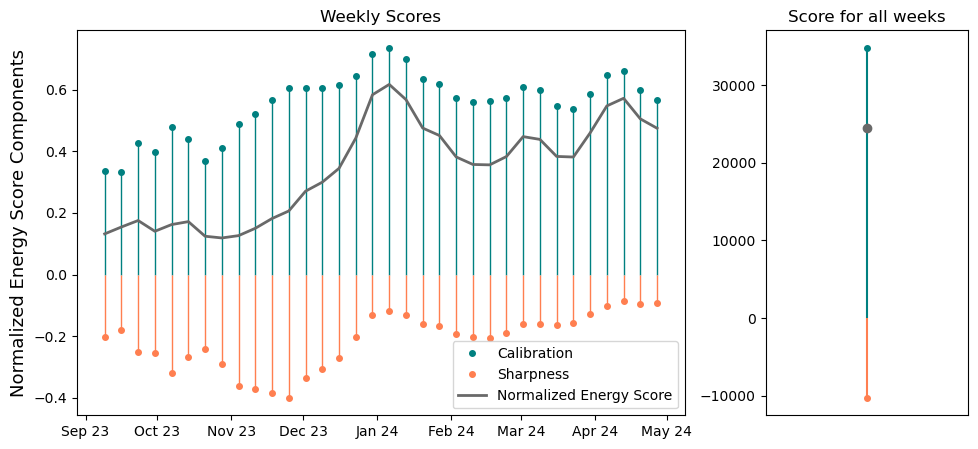

In [49]:
# merge together

# ES for each week
observations['date'] = pd.to_datetime(observations['date'])

observations = observations[(observations['date'] >= start_week) & \
                                        (observations['date'] <= max_date)]   


#aggregate to weekly
observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()

#transform to Observation object
observations = Observations(observations)

#filter location
observations = observations[observations['location'] == location]

ESsum = []
ESsub = []
ESall = []
for date in observations.date.unique():
    obs = observations[observations.date==date]
    pdf = predictionsfilt[predictionsfilt.target_end_date==date]
    
    y = np.array(obs.value)
    X = [np.array(pdf[pdf['output_type_id'] == i].value) for i in pdf['output_type_id'].unique()]


    ES1, ES2 = energyscore_terms_norm(np.array(X),y)

    ES = normalized_energyscore(np.array(X), y)
    
    ESsum.append(ES1)
    ESsub.append(ES2)
    ESall.append(ES)

dates = observations.date.unique()
fig, ax = plt.subplots(1,2,figsize=(11.5,5), width_ratios=[3, 1])
plt.subplot(1,2,1)
ax[0].vlines(dates, ymin=0, ymax=ESsum, color='teal', linewidth=1) 
  
# drawing the markers (circle) 
plt.plot(dates, ESsum, "o",markersize=4, color='teal', label='Calibration') 

ax[0].vlines(dates, ymin=ESsub, ymax=0, color='coral', linewidth=1) 
plt.plot(dates, ESsub, "o",markersize=4, color='coral', label='Sharpness') 
  
plt.plot(dates, ESall,linewidth=2, color='dimgray', label='Normalized Energy Score') 
set_date_axis_fmt(ax[0])
   
plt.legend()
plt.ylabel('Normalized Energy Score Components', fontsize=13)

plt.title('Weekly Scores')

# full ES
observations['date'] = pd.to_datetime(observations['date'])

observations = observations[(observations['date'] >= start_week) & \
                                        (observations['date'] <= max_date)]   

#aggregate to weekly
observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()

#transform to Observation object
observations = Observations(observations)

#filter location
observations = observations[observations['location'] == location]

ESsum = []
ESsub = []
ESall = []
 
y = np.array(observations.value)
X = [np.array(predictionsfilt[predictionsfilt['output_type_id'] == i].value) for i in pdf['output_type_id'].unique()]


ES1, ES2 = energyscore_terms(np.array(X),y)

ES = energyscore(np.array(X), y)

ESsum.append(ES1)
ESsub.append(ES2)
ESall.append(ES)

plt.subplot(1,2,2)
ax[1].vlines([1],ymin=0, ymax=ESsum, color='teal') 
  
# drawing the markers (circle) 
plt.plot([1], ESsum, "o",markersize=4, color='teal', label='Calibration') 

ax[1].vlines([1], ymin=ESsub, ymax=0, color='coral') 
plt.plot([1], ESsub, "o",markersize=4, color='coral', label='Sharpness') 
  
plt.plot([1], ESall,'o' ,markersize=6,color='dimgray', label='Normalized energy score') 
   
#plt.legend()

plt.xticks([])
plt.title('Score for all weeks')
plt.savefig('../figs/normalized_energyscore_decomp.pdf')


